In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
import statsmodels.api as sm

In [3]:
# 데이터 불러오기

data = pd.read_csv('/Users/annakim/Library/CloudStorage/OneDrive-성신여자대학교/BOAZ/ADV/버블클라우드/data/부산_최종.csv')
data.head()

,Unnamed: 0,구,반려동물수,인구밀도,업체명,평균소득수준
0,0,중구,1980,15114,13,2944.313415
1,1,서구,881,7596,17,2434.321923
2,2,동구,1217,9150,11,2191.144286
3,3,영도구,964,7835,18,2193.353333
4,4,부산진구,1609,11921,71,2843.894583


In [4]:
# 필요 없는 컬럼 삭제

data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.head()

,구,반려동물수,인구밀도,업체명,평균소득수준
0,중구,1980,15114,13,2944.313415
1,서구,881,7596,17,2434.321923
2,동구,1217,9150,11,2191.144286
3,영도구,964,7835,18,2193.353333
4,부산진구,1609,11921,71,2843.894583


In [6]:
# 원본 데이터 해치지 않도록 복사본 만들기

processed_data = data.copy()

# 정규화

scaler = preprocessing.MinMaxScaler()
processed_data[['반려동물수', '인구밀도', '평균소득수준']] = scaler.fit_transform(processed_data[['반려동물수', '인구밀도', '평균소득수준']])

In [7]:
y = processed_data['업체명']
x = processed_data[['반려동물수', '인구밀도', '평균소득수준']]

In [8]:
# 회귀 분석을 통한 다중공선성 확인

multi_model = sm.OLS(y, x)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    업체명   R-squared (uncentered):                   0.800
Model:                            OLS   Adj. R-squared (uncentered):              0.754
Method:                 Least Squares   F-statistic:                              17.38
Date:                Fri, 29 Jul 2022   Prob (F-statistic):                    7.80e-05
Time:                        12:42:53   Log-Likelihood:                         -71.219
No. Observations:                  16   AIC:                                      148.4
Df Residuals:                      13   BIC:                                      150.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
반려동물수         26.1874     62.624      0.418      0.683    -109.103     161.478
인구밀도          -1.7726     62.874     -0.028      0.978    -137.605     134.059
평균소득수준        59.0930     17.608      3.356      0.005      21.053      97.132
==============================================================================
Omnibus:                        0.460   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.795   Jarque-Bera (JB):                0.273
Skew:                           0.288   Prob(JB):                        0.872
Kurtosis:                       2.720   Cond. No.                         14.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

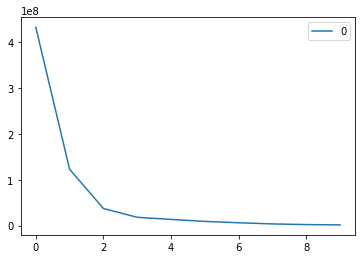

In [12]:
# elbow method로 적합한 k 찾기

inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k).fit(x)
    value = kmeans.inertia_
    inertia.append(value)

pd.DataFrame(inertia).plot()

In [13]:
# 군집 3개로 나눠서 kmeans 적용

kmeans = KMeans(n_clusters=3).fit(x)
processed_data['cluster_id'] = kmeans.labels_

In [14]:
# 각 군집의 개수 확인

processed_data['cluster_id'].value_counts()

0    9
2    4
1    3
Name: cluster_id, dtype: int64

In [15]:
# 군집 0

processed_data[processed_data['cluster_id']==0]

,구,반려동물수,인구밀도,업체명,평균소득수준,cluster_id
1,서구,0.411355,0.412434,17,0.119535,0
2,동구,0.591323,0.506965,11,0.000000,0
3,영도구,0.455811,0.426972,18,0.001086,0
4,부산진구,0.801285,0.675528,71,0.320863,0
6,남구,0.460096,0.553805,44,0.352240,0
7,북구,0.447777,0.387554,51,0.528705,0
8,해운대구,0.468666,0.420038,93,0.710265,0
9,사하구,0.372255,0.401423,60,0.155874,0
14,사상구,0.305303,0.305676,17,0.399472,0


In [16]:
# 군집 1

processed_data[processed_data['cluster_id']==1]

,구,반려동물수,인구밀도,업체명,평균소득수준,cluster_id
10,금정구,0.137118,0.163879,38,0.529266,1
11,강서구,0.000000,0.000000,34,0.652071,1
15,기장군,0.001071,0.000122,32,0.598467,1


In [17]:
# 군집 2

processed_data[processed_data['cluster_id']==2]

,구,반려동물수,인구밀도,업체명,평균소득수준,cluster_id
0,중구,1.000000,0.869761,13,0.370224,2
5,동래구,0.878950,0.956749,54,0.665048,2
12,연제구,0.720407,0.993978,45,0.436954,2
13,수영구,0.983931,1.000000,54,1.000000,2


Text(0.5, 0, 'ave income')

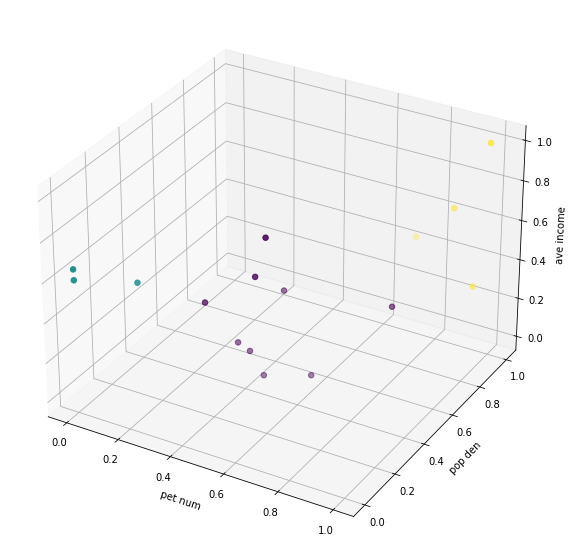

In [18]:
# 3d 그래프로 군집화 확인

plt.figure(figsize = (10, 10))
axes = plt.axes(projection = '3d')
axes.scatter3D(processed_data['반려동물수'], processed_data['인구밀도'], processed_data['평균소득수준'], c = processed_data['cluster_id'], s = 30)
axes.set_xlabel('pet num')
axes.set_ylabel('pop den')
axes.set_zlabel('ave income')

1. 보라색(cluster = 0) : 반려동물 수 중간, 인구 밀도 중간, 소득 수준 낮은 집단
2. 초록색(cluster = 1) : 반려동물 수 적고, 인구 밀도 낮고, 소득 수준 중간 집단
3. **노란색(cluster = 2)** : 반려동물 수 만고, 인구 밀도 높고, 소득 수준 높은/중간 집단

그루머노트는 애견미용샵 '관리' 앱이기 때문에 고객이 많이 없으면 굳이 그루머노트의 수요가 없을 듯  
-> 반려동물수가 높을수록 미용실 수요가 높다는 뜻  
-> 인구 밀도와 소득수준이 높으면 수요의 양적, 질적 수준이 높다는 뜻  


이 중 **군집 2** 가 가장 best

In [19]:
# 태블로에 최종 적용할 데이터 만들기 위해 컬럼 명 수정

processed_data.rename(columns = {'반려동물수':'반려동물수_scaled', '인구밀도':'인구밀도_scaled', '업체명':'업체수', '평균소득수준':'평균소득수준_scaled'}, inplace = True)
processed_data.head()

,구,반려동물수_scaled,인구밀도_scaled,업체수,평균소득수준_scaled,cluster_id
0,중구,1.000000,0.869761,13,0.370224,2
1,서구,0.411355,0.412434,17,0.119535,0
2,동구,0.591323,0.506965,11,0.000000,0
3,영도구,0.455811,0.426972,18,0.001086,0
4,부산진구,0.801285,0.675528,71,0.320863,0


In [21]:
# 원본 데이터에 정규화된 데이터 합치기

final = pd.merge(data, processed_data, on = '구')
final.drop('업체명', axis = 1, inplace = True)
final

,구,반려동물수,인구밀도,평균소득수준,반려동물수_scaled,인구밀도_scaled,업체수,평균소득수준_scaled,cluster_id
0,중구,1980,15114,2944.313415,1.000000,0.869761,13,0.370224,2
1,서구,881,7596,2434.321923,0.411355,0.412434,17,0.119535,0
2,동구,1217,9150,2191.144286,0.591323,0.506965,11,0.000000,0
3,영도구,964,7835,2193.353333,0.455811,0.426972,18,0.001086,0
4,부산진구,1609,11921,2843.894583,0.801285,0.675528,71,0.320863,0
5,동래구,1754,16544,3544.090667,0.878950,0.956749,54,0.665048,2
6,남구,972,9920,2907.727059,0.460096,0.553805,44,0.352240,0
7,북구,949,7187,3266.720000,0.447777,0.387554,51,0.528705,0
8,해운대구,988,7721,3636.078947,0.468666,0.420038,93,0.710265,0
9,사하구,808,7415,2508.247500,0.372255,0.401423,60,0.155874,0


In [20]:
# 선택한 클러스터의 데이터만 뽑아내기

clus = processed_data[processed_data['cluster_id']==2]
clus

,구,반려동물수_scaled,인구밀도_scaled,업체수,평균소득수준_scaled,cluster_id
0,중구,1.000000,0.869761,13,0.370224,2
5,동래구,0.878950,0.956749,54,0.665048,2
12,연제구,0.720407,0.993978,45,0.436954,2
13,수영구,0.983931,1.000000,54,1.000000,2


In [22]:
# 선택한 클러스터 내에서 새로 정규화

temp = final[final['cluster_id']==2]

temp[['반려동물수_rescaled', '인구밀도_rescaled', '평균소득수준_rescaled', '업체수_rescaled']] = scaler.fit_transform(temp[['반려동물수', '인구밀도', '평균소득수준', '업체수']])
temp.drop(['반려동물수', '인구밀도', '평균소득수준', '반려동물수_scaled', '인구밀도_scaled', '평균소득수준_scaled', '업체수', 'cluster_id'], axis = 1, inplace = True)
temp

/var/folders/jc/r06f24ps7fl0l4jxt1pj77dw0000gn/T/ipykernel_1269/2578384699.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[['반려동물수_rescaled', '인구밀도_rescaled', '평균소득수준_rescaled', '업체수_rescaled']] = scaler.fit_transform(temp[['반려동물수', '인구밀도', '평균소득수준', '업체수']])
/var/folders/jc/r06f24ps7fl0l4jxt1pj77dw0000gn/T/ipykernel_1269/2578384699.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp[['반려동물수_rescaled', '인구밀도_rescaled', '평균소득수준_rescaled', '업체수_rescaled']] = scaler.fit_transform(temp[['반려동물수', '

,구,반려동물수_rescaled,인구밀도_rescaled,평균소득수준_rescaled,업체수_rescaled
0,중구,1.000000,0.000000,0.000000,0.000000
5,동래구,0.567050,0.667912,0.468141,1.000000
12,연제구,0.000000,0.953760,0.105959,0.780488
13,수영구,0.942529,1.000000,1.000000,1.000000


In [23]:
# 최종 데이터프레임 만들기

final2 = pd.merge(final, temp, how = 'outer', on = '구')
final2

,구,반려동물수,인구밀도,평균소득수준,반려동물수_scaled,인구밀도_scaled,업체수,평균소득수준_scaled,cluster_id,반려동물수_rescaled,인구밀도_rescaled,평균소득수준_rescaled,업체수_rescaled
0,중구,1980,15114,2944.313415,1.000000,0.869761,13,0.370224,2,1.000000,0.000000,0.000000,0.000000
1,서구,881,7596,2434.321923,0.411355,0.412434,17,0.119535,0,NaN,NaN,NaN,NaN
2,동구,1217,9150,2191.144286,0.591323,0.506965,11,0.000000,0,NaN,NaN,NaN,NaN
3,영도구,964,7835,2193.353333,0.455811,0.426972,18,0.001086,0,NaN,NaN,NaN,NaN
4,부산진구,1609,11921,2843.894583,0.801285,0.675528,71,0.320863,0,NaN,NaN,NaN,NaN
5,동래구,1754,16544,3544.090667,0.878950,0.956749,54,0.665048,2,0.567050,0.667912,0.468141,1.000000
6,남구,972,9920,2907.727059,0.460096,0.553805,44,0.352240,0,NaN,NaN,NaN,NaN
7,북구,949,7187,3266.720000,0.447777,0.387554,51,0.528705,0,NaN,NaN,NaN,NaN
8,해운대구,988,7721,3636.078947,0.468666,0.420038,93,0.710265,0,NaN,NaN,NaN,NaN
9,사하구,808,7415,2508.247500,0.372255,0.401423,60,0.155874,0,NaN,NaN,NaN,NaN


In [25]:
# 파일 내보내기

final2.to_csv('부산_전체.csv')